In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from IPython import get_ipython
ipython = get_ipython()
ipython.Completer.use_jedi = False

## divisione dati

In [92]:
train= pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2309 non-null   int64  
 1   title_word_count            2309 non-null   int64  
 2   document_entropy            2309 non-null   float64
 3   freshness                   2309 non-null   int64  
 4   easiness                    2309 non-null   float64
 5   fraction_stopword_presence  2309 non-null   float64
 6   normalization_rate          2309 non-null   float64
 7   speaker_speed               2309 non-null   float64
 8   silent_period_rate          2309 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 162.5 KB


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9239 entries, 0 to 9238
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9239 non-null   int64  
 1   title_word_count            9239 non-null   int64  
 2   document_entropy            9239 non-null   float64
 3   freshness                   9239 non-null   int64  
 4   easiness                    9239 non-null   float64
 5   fraction_stopword_presence  9239 non-null   float64
 6   normalization_rate          9239 non-null   float64
 7   speaker_speed               9239 non-null   float64
 8   silent_period_rate          9239 non-null   float64
 9   engagement                  9239 non-null   bool   
dtypes: bool(1), float64(6), int64(3)
memory usage: 658.8 KB


In [19]:
x_tr=train[['id','title_word_count', 'document_entropy', 'freshness', 'easiness',
       'fraction_stopword_presence', 'normalization_rate', 'speaker_speed',
       'silent_period_rate']]
y_tr=train['engagement']

In [21]:
train.head(2)

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate,engagement
0,1,9,7.753995,16310,75.583936,0.553664,0.034049,2.997753,0.0,True
1,2,6,8.305269,15410,86.870523,0.584498,0.018763,2.635789,0.0,False


### split del training set in train e validation

In [24]:
x_train,x_validation,y_train,y_validation=train_test_split(x_tr,y_tr)

In [26]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((6929, 9), (2310, 9), (6929,), (2310,))

In [28]:
x_validation.head(2)

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate
5668,5669,12,6.456785,13780,104.254790,0.707904,0.006873,1.430000,0.000000
8240,8241,4,8.275309,14460,83.995285,0.651846,0.021289,8.141534,0.239387


In [31]:
corr=train.corr()

<Axes: >

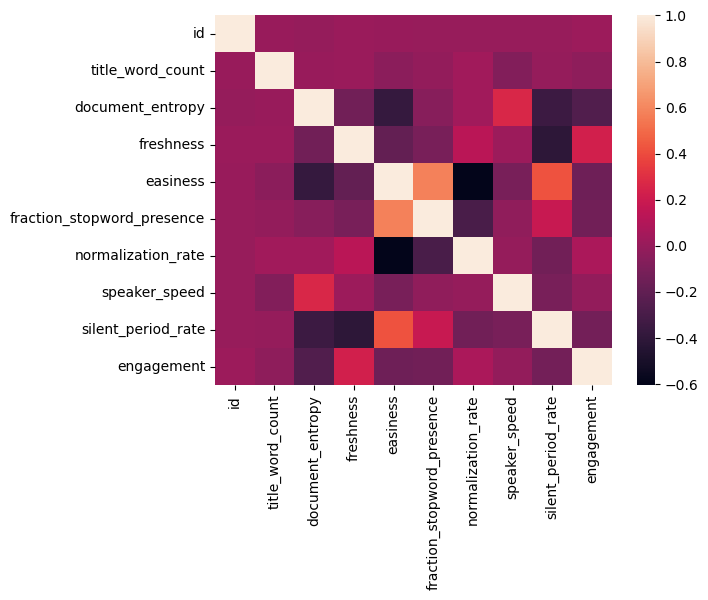

In [33]:
sns.heatmap(corr)

## random forest

In [35]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((6929, 9), (2310, 9), (6929,), (2310,))

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

results = []

def specificity_score(y_true, y_pred):
    """Calculate specificity from the confusion matrix"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Loop over different hyperparameter values
for i in (5, 6, 7, 8, 9, 11):  # max_depth
    for g in (3, 4, 5, 6):  # max_features
        for h in (0.11, 0.12, 0.13):  # Probability threshold
            # Train the model with specified parameters
            rand_for = RandomForestClassifier(random_state=0, max_depth=i, max_features=g)
            rand_for.fit(x_train, y_train)

            # Get class probabilities
            predict = rand_for.predict_proba(x_validation)[:, 1]

            # Apply the custom threshold
            y_pred = (predict >= h).astype(int)  

            # Compute metrics
            acc = accuracy_score(y_validation, y_pred)
            rec = recall_score(y_validation, y_pred)
            prec = precision_score(y_validation, y_pred)
            spec = specificity_score(y_validation, y_pred)
            f1_scor = f1_score(y_validation, y_pred)

            # Store results
            results.append({
                'max_depth': i,
                'max_features': g,
                'threshold': h,  
                'accuracy': acc,
                'recall': rec,
                'precision': prec,
                'specificity': spec,
                'f1_score': f1_scor
            })

# Convert results into a DataFrame
results_df_rf = pd.DataFrame(results)


In [51]:
results_df_rf.sort_values(by='f1_score',ascending=False)  #scegliamo il modello 8,5 

,max_depth,max_features,threshold,accuracy,recall,precision,specificity,f1_score
43,8,5,0.12,0.894372,0.758772,0.477901,0.909222,0.586441
44,8,5,0.13,0.898268,0.728070,0.489676,0.916907,0.585538
56,9,5,0.13,0.896104,0.741228,0.482857,0.913064,0.584775
53,9,4,0.13,0.894372,0.750000,0.477654,0.910183,0.583618
68,11,5,0.13,0.891342,0.767544,0.469169,0.904899,0.582363
...,...,...,...,...,...,...,...,...
3,5,4,0.11,0.874892,0.692982,0.419098,0.894813,0.522314
1,5,3,0.12,0.877922,0.675439,0.425414,0.900096,0.522034
6,5,5,0.11,0.872727,0.701754,0.414508,0.891451,0.521173
2,5,3,0.13,0.881385,0.653509,0.433140,0.906340,0.520979


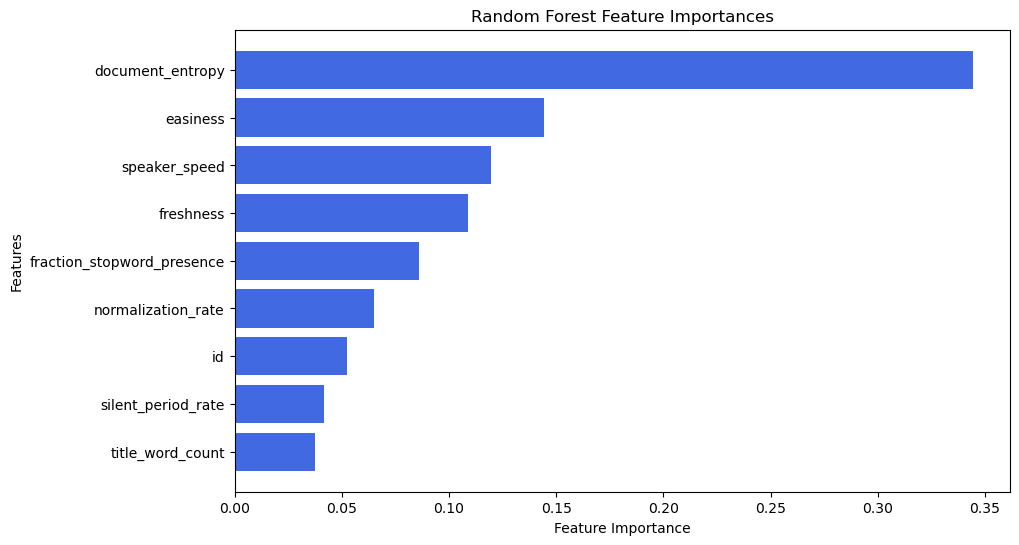

In [52]:
feature_importances = rand_for.feature_importances_

# Creare un DataFrame con le feature e le loro importanze
features_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Ordinare le feature per importanza decrescente
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot delle feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='royalblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Invertire l'asse per mostrare la più importante in alto
plt.show()

### logistic regression

In [54]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Addestrare il modello di regressione logistica

results = []

# Loop su diversi valori di C (regolarizzazione)
for i in (0.0001, 0.001, 0.01, 0.1, 1, 10, 100):
    for g in (0.1, 0.12, 0.13, 0.14, 0.15):  # Indentazione corretta
        # Addestrare il modello con valore di C variabile
        log_reg = LogisticRegression(max_iter=10000, C=i)
        log_reg.fit(x_train, y_train)

        # Ottenere le probabilità della classe positiva
        log_prob = log_reg.predict_proba(x_validation)[:, 1]

        # Applicare la soglia personalizzata (g variabile)
        log_predict = (log_prob > g).astype(int)

        # Calcolare le metriche
        acc_log = accuracy_score(y_validation, log_predict)
        rec_log = recall_score(y_validation, log_predict)
        prec_log = precision_score(y_validation, log_predict)
        spec_log = specificity_score(y_validation, log_predict)
        f1_scor_log = f1_score(y_validation, log_predict)

        # Aggiungere i risultati alla lista, includendo la soglia g
        results.append({
            "C": i,
            "Threshold": g,  # Aggiunto threshold g ai risultati
            "Accuracy": acc_log,
            "Recall": rec_log,
            "Precision": prec_log,
            "Specificity": spec_log,
            "F1-score": f1_scor_log
        })

# Convertire la lista in un DataFrame
result_log_df = pd.DataFrame(results)


In [55]:
result_log_df_sorted = result_log_df.sort_values(by="F1-score", ascending=False)

In [56]:
result_log_df_sorted #threshold=0.15,c=0.1

,C,Threshold,Accuracy,Recall,Precision,Specificity,F1-score
19,0.1000,0.15,0.856710,0.723684,0.381062,0.871278,0.499244
24,1.0000,0.15,0.854978,0.723684,0.377574,0.869356,0.496241
29,10.0000,0.15,0.854978,0.714912,0.376443,0.870317,0.493192
34,100.0000,0.15,0.854545,0.701754,0.373832,0.871278,0.487805
28,10.0000,0.14,0.845455,0.732456,0.360691,0.857829,0.483357
33,100.0000,0.14,0.847186,0.714912,0.361419,0.861671,0.480118
18,0.1000,0.14,0.841558,0.736842,0.354430,0.853026,0.478632
23,1.0000,0.14,0.841558,0.732456,0.353814,0.853506,0.477143
14,0.0100,0.15,0.848485,0.684211,0.359447,0.866475,0.471299
22,1.0000,0.13,0.829437,0.767544,0.339147,0.836215,0.470430


#### boosting

In [58]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Lista per salvare i risultati
results_boosting = []

# Definizione dei valori da testare
lr_values = (0.1,)
n_est_values = (50,)
threshold_values = (0.12, 0.13)
depth_values = (5, 5, 7, 8, 9, 10)
features_values = (3, 4, 5, 6, 7, 8)

for i in lr_values:
    for n in n_est_values:
        for d in depth_values:
            for f in features_values:
                # Addestramento del modello con i parametri attuali
                grad_boost = GradientBoostingClassifier(
                    learning_rate=i, 
                    n_estimators=n, 
                    max_depth=d, 
                    max_features=f
                )
                grad_boost.fit(x_train, y_train)  # Assicurati che x_train e y_train siano definiti

                # Probabilità predette
                prob_boost = grad_boost.predict_proba(x_validation)[:, 1]

                for h in threshold_values:
                    # Predizioni con la soglia h
                    predict_boost = (prob_boost > h).astype(int)

                    # Calcolo metriche
                    acc_boost = accuracy_score(y_validation, predict_boost)
                    rec_boost = recall_score(y_validation, predict_boost)
                    prec_boost = precision_score(y_validation, predict_boost)
                    f1_boost = f1_score(y_validation, predict_boost)

                    # Specificità (1 - false positive rate)
                    tn, fp, fn, tp = confusion_matrix(y_validation, predict_boost).ravel()
                    spec_boost = tn / (tn + fp) if (tn + fp) > 0 else 0  # Evita divisione per zero

                    # Aggiunta ai risultati
                    results_boosting.append({
                        "Learning Rate": i,
                        "n_estimators": n,
                        "Max Depth": d,
                        "Max Features": f,
                        "Threshold": h,
                        "Accuracy": acc_boost,
                        "Recall": rec_boost,
                        "Precision": prec_boost,
                        "Specificity": spec_boost,
                        "F1-score": f1_boost
                    })

# Convertire la lista in un DataFrame
results_boosting_df = pd.DataFrame(results_boosting)


In [59]:
results_boosting_df.sort_values(by='F1-score',ascending=False).head(12) #n_estimator=50,lr=0.1,depth=8,features=4

,Learning Rate,n_estimators,Max Depth,Max Features,Threshold,Accuracy,Recall,Precision,Specificity,F1-score
67,0.1,50,10,6,0.13,0.918182,0.640351,0.577075,0.948607,0.607069
66,0.1,50,10,6,0.12,0.917316,0.644737,0.571984,0.947166,0.606186
53,0.1,50,9,5,0.13,0.915584,0.649123,0.562738,0.944765,0.602851
52,0.1,50,9,5,0.12,0.914719,0.653509,0.558052,0.943324,0.602020
61,0.1,50,10,3,0.13,0.918182,0.618421,0.580247,0.951009,0.598726
39,0.1,50,8,4,0.13,0.909524,0.679825,0.532646,0.934678,0.597303
9,0.1,50,5,7,0.13,0.903463,0.714912,0.507788,0.924111,0.593807
69,0.1,50,10,7,0.13,0.916883,0.614035,0.573770,0.950048,0.593220
37,0.1,50,8,3,0.13,0.909091,0.671053,0.531250,0.935159,0.593023
58,0.1,50,9,8,0.12,0.912987,0.640351,0.550943,0.942843,0.592292


### curve roc auc

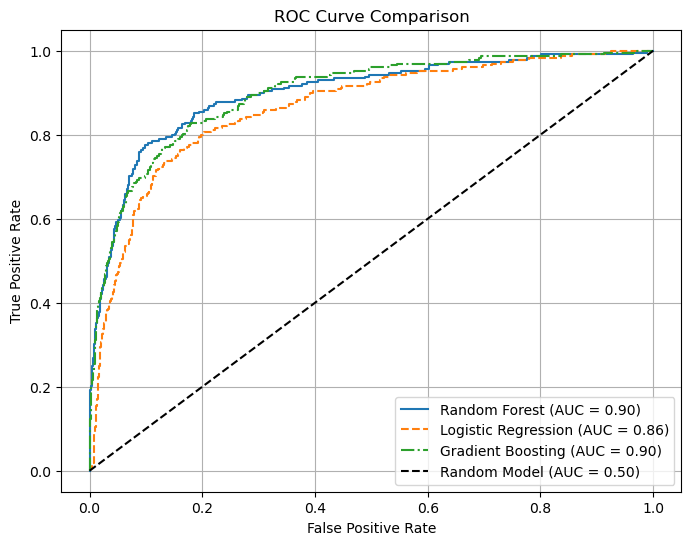

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Addestramento dei modelli finali con i migliori iperparametri
rf_fin = RandomForestClassifier(max_depth=8, max_features=5, random_state=0).fit(x_train, y_train)
log_reg_fin = LogisticRegression(max_iter=10000, C=0.1, random_state=0).fit(x_train, y_train)
boosting_fin = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=8, random_state=0).fit(x_train, y_train)

# Calcolare le probabilità predette per la classe positiva (colonna 1)
prob_rf_fin = rf_fin.predict_proba(x_validation)[:, 1] 
prob_log_reg_fin = log_reg_fin.predict_proba(x_validation)[:, 1]
prob_boosting_fin = boosting_fin.predict_proba(x_validation)[:, 1]

# Calcolare le curve ROC
fpr1, tpr1, _ = roc_curve(y_validation, prob_rf_fin)
fpr2, tpr2, _ = roc_curve(y_validation, prob_log_reg_fin)
fpr3, tpr3, _ = roc_curve(y_validation, prob_boosting_fin)

# Calcolare l'area sotto la curva AUC
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)

# Tracciare le curve ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'Random Forest (AUC = {auc1:.2f})', linestyle='-')
plt.plot(fpr2, tpr2, label=f'Logistic Regression (AUC = {auc2:.2f})', linestyle='--')
plt.plot(fpr3, tpr3, label=f'Gradient Boosting (AUC = {auc3:.2f})', linestyle='-.')

# Linea diagonale che rappresenta il modello casuale
plt.plot([0, 1], [0, 1], 'k--', label="Random Model (AUC = 0.50)")

# Etichette e titolo
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()

# Mostrare il grafico
plt.show()

In [75]:
results_modelli = []

# Soglie da testare
thresholds = [0.12, 0.13]

# Lista dei modelli e dei loro nomi
models = {
    "Random Forest": rf_fin,
    "Logistic Regression": log_reg_fin,
    "Gradient Boosting": boosting_fin
}

# Calcolo delle metriche per ogni modello con diverse soglie
for name, model in models.items():
    # Ottenere le probabilità della classe positiva
    y_prob = model.predict_proba(x_validation)[:, 1]
    
    for threshold in thresholds:
        # Applicare la soglia personalizzata
        y_pred = (y_prob >= threshold).astype(int)

        # Calcolare le metriche
        acc = accuracy_score(y_validation, y_pred)
        rec = recall_score(y_validation, y_pred)  # Sensitivity = Recall
        f1 = f1_score(y_validation, y_pred)
        prec=precision_score(y_validation,y_pred)

        # Aggiungere i risultati alla lista
        results_modelli.append({
            "Model": name,
            "Threshold": threshold,
            "Accuracy": acc,
            "Sensitivity (Recall)": rec,
            "Specificity": spec,
            "F1-score": f1,
            'precision':prec
        })

# Creare il DataFrame con i risultati
results_df_modelli = pd.DataFrame(results_modelli)

In [76]:
results_df_modelli.sort_values(by='F1-score',ascending=False)

,Model,Threshold,Accuracy,Sensitivity (Recall),Specificity,F1-score,precision
0,Random Forest,0.12,0.894372,0.758772,0.900576,0.586441,0.477901
1,Random Forest,0.13,0.898268,0.728070,0.900576,0.585538,0.489676
5,Gradient Boosting,0.13,0.906926,0.657895,0.900576,0.582524,0.522648
4,Gradient Boosting,0.12,0.905195,0.666667,0.900576,0.581262,0.515254
3,Logistic Regression,0.13,0.825974,0.767544,0.900576,0.465426,0.333969
2,Logistic Regression,0.12,0.811255,0.780702,0.900576,0.449495,0.315603


In [77]:
#0	Random Forest	0.12	0.886580	0.742081	0.895165	0.555932	0.444444 scelgo random forest

### test prediction probabiltiy

In [108]:
rf_fin = RandomForestClassifier(max_depth=8, max_features=5, random_state=0).fit(x_train, y_train)
pr_test=rf_fin.predict_proba(test)[:,1]

#df
df_results = pd.DataFrame({
    'ID': test['id'] ,  # Replace test_ids with the actual ID column from your test dataset
    'Probability': pr_test
})

In [110]:
df_results

,ID,Probability
0,9240,0.051056
1,9241,0.053300
2,9242,0.166667
3,9243,0.904760
4,9244,0.049961
...,...,...
2304,11544,0.029586
2305,11545,0.010520
2306,11546,0.010536
2307,11547,0.925675


In [126]:
def engagement_model():
    # Ensure the ID column name matches exactly
    id_column = test['id']  # Ensure this column exists in the 'test' dataset
    
    # Create a Series with ID as index and probabilities as values
    result_series = pd.Series(data=pr_test, index=id_column)
    
    return result_series



In [128]:
# Run function
stu_ans = engagement_model()

# Assertions (automated checks)
assert isinstance(stu_ans, pd.Series), "Your function should return a pd.Series."
assert len(stu_ans) == 2309, "Your series is of incorrect length: expected 2309."
assert np.issubdtype(stu_ans.index.dtype, np.integer), "Your answer pd.Series should have an index of integer type."


In [130]:
engagement_model()

id
9240     0.051056
9241     0.053300
9242     0.166667
9243     0.904760
9244     0.049961
           ...   
11544    0.029586
11545    0.010520
11546    0.010536
11547    0.925675
11548    0.017318
Length: 2309, dtype: float64

FileNotFoundError: [WinError 3] Impossibile trovare il percorso specificato: 'assignments/course3_assignment4/assets/'